# Text-To-Image LLM Server

This repository is designed to be used with Visual Studio Code and Docker DevContainer.

![dev-container](../img/dev-container.png)


## 1. Setup

**Instructions:**

a) Download model

```bash
# Create a directory for stable diffusion models
mkdir ~/gai/models/Stable-diffusion

# Download the model
huggingface-cli download runwayml/stable-diffusion-v1-5 \
    v1-5-pruned-emaonly.safetensors \
    --local-dir ~/gai/models/Stable-diffusion \
    --local-dir-use-symlinks False
```

---

## 2. API Test

**Instructions**:

a) Inspect or update the AUTOMATIC1111 webui server settings in **/.vscode/launch.json**

```json
{
    "name": "Python Debugger: gai-itt server",
    ...,
    "args": [
        "--port",
        "12035",
        "--listen",
        "--api",
        "--xformers",
        "--medvram",
        "--ckpt",
        "/stable-diffusion-webui/models/Stable-diffusion/runwayml/v1-5-pruned-emaonly.safetensors",
        "--no-download-sd-model"
    ],
}
```

b) Press **F5** to start webui. Wait for the loading to complete.

**Simple Test**:

c) Run the following cells to test the API.

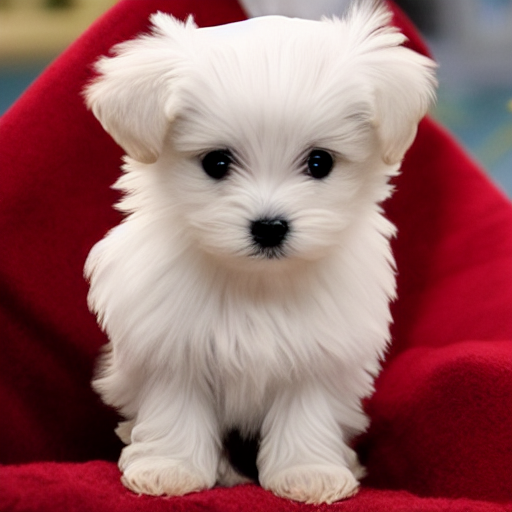

In [1]:
import requests
import json, base64
data = {
    "prompt": "maltese puppy",
    "seed": 14159265,
}    
response = requests.post('http://localhost:12035/sdapi/v1/txt2img',json=data)

import json,base64
base64_img = json.loads(response.content.decode("utf-8"))["images"][0]
image_data = base64.b64decode(base64_img)
from PIL import Image
from io import BytesIO
image = Image.open(BytesIO(image_data))
image

**Complex Test:**

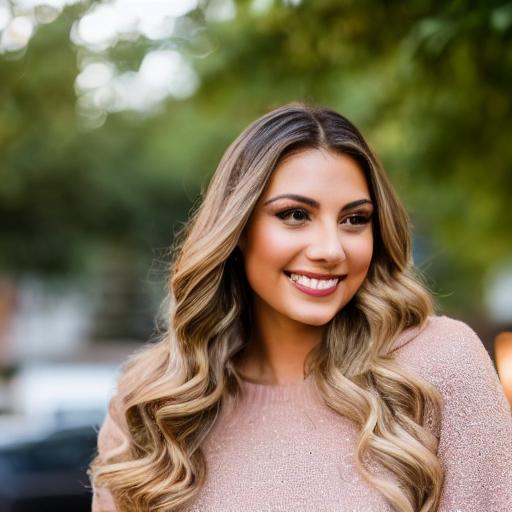

In [2]:
import requests
import json, base64
data = {
    "prompt": "photo of young woman, highlight hair, sitting outside restaurant, wearing dress, rim lighting, studio lighting, looking at the camera, dslr, ultra quality, sharp focus, tack sharp, dof, film grain, Fujifilm XT3, crystal clear, 8K UHD, highly detailed glossy eyes, high detailed skin, skin pores",
    "negative_prompt": "disfigured, ugly, bad, immature, cartoon, anime, 3d, painting, b&w, distorted eyes",
    "steps": 20,
    "cfg_scale": 7,
    "seed": 15926535,
    "sampler_index": "DPM++ 2M"
}    
response = requests.post('http://localhost:12035/sdapi/v1/txt2img',json=data)

import json,base64
base64_img = json.loads(response.content.decode("utf-8"))["images"][0]
image_data = base64.b64decode(base64_img)
from PIL import Image
from io import BytesIO
image = Image.open(BytesIO(image_data))
image

---

## Docker

This test should **NOT** be run in devcontainer.

**Instructions:** 

- Click on bottom left blue button and select **Reopen Folder in WSL**

- Create and activate conda environment

    ```bash
    conda env create -f environment.yml
    conda activate gai-tti
    ```

- Press **CTRL+SHIFT+P** > **Python: Select Interpreter**

- Press **CTRL+SHIFT+P** > **Tasks: Run Task** > **Docker: build**

- Press **CTRL+SHIFT+P** > **Tasks: Run Task** > **Docker: run**

**Tests:**

Repeat the API test (#)

**Tear Down:**

- Press **CTRL+SHIFT+P** > **Tasks: Run Task** > **Docker: stop**